<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Useful-Links" data-toc-modified-id="Useful-Links-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Useful Links</a></span></li><li><span><a href="#Imports" data-toc-modified-id="Imports-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Imports</a></span></li><li><span><a href="#Retrieve-information-about-Europa-relating-to-our-location-and-given-time-frame:" data-toc-modified-id="Retrieve-information-about-Europa-relating-to-our-location-and-given-time-frame:-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Retrieve information about Europa relating to our location and given time frame:</a></span></li><li><span><a href="#Format-equatorial-coordinates" data-toc-modified-id="Format-equatorial-coordinates-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Format equatorial coordinates</a></span></li><li><span><a href="#Get-center-coordinates" data-toc-modified-id="Get-center-coordinates-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Get center coordinates</a></span></li><li><span><a href="#Retrieve-DSS-survey-images-at-FOV=1deg-and-FOV=11min" data-toc-modified-id="Retrieve-DSS-survey-images-at-FOV=1deg-and-FOV=11min-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Retrieve DSS survey images at FOV=1deg and FOV=11min</a></span></li><li><span><a href="#Image-Data-and-WCS-conversion" data-toc-modified-id="Image-Data-and-WCS-conversion-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Image Data and WCS conversion</a></span></li><li><span><a href="#Image-FOV-and-Overplot-Asteroid-Coordinates" data-toc-modified-id="Image-FOV-and-Overplot-Asteroid-Coordinates-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Image FOV and Overplot Asteroid Coordinates</a></span></li><li><span><a href="#Query-Objects-in-FOV-and-Plot" data-toc-modified-id="Query-Objects-in-FOV-and-Plot-9"><span class="toc-item-num">9&nbsp;&nbsp;</span>Query Objects in FOV and Plot</a></span></li></ul></div>

# Seminar 7 - Asteroids and Minor Planets

## Useful Links


WCS and astronomic coordinate handling:
- https://docs.astropy.org/en/stable/wcs/
- http://docs.astropy.org/en/stable/visualization/wcsaxes/overlays.html



NASA JPS webpage to retrieve info about observable minor solar system objects:
https://ssd.jpl.nasa.gov/sbwobs.cgi


MPC: Minor solar system object database:
https://www.minorplanetcenter.net/data

astroplan
- https://astroplan.readthedocs.io/en/latest/tutorials/plots.html

## Imports

In [1]:
import numpy as np
from matplotlib import pylab as plt

import datetime as dt

### for minor solar system objects
import astroquery.jplhorizons as jp

import astroquery.skyview as SW
from astropy.wcs import WCS
from astropy import units as u
from astropy.coordinates import SkyCoord

from astroquery.simbad import Simbad
from astroquery.sdss import SDSS

/usr/lib/python2.7/site-packages/astroquery/sdss/__init__.py:29: UserWarning: Experimental: SDSS has not yet been refactored to have its API match the rest of astroquery (but it's nearly there).
  warnings.warn("Experimental: SDSS has not yet been refactored to have its API "


Set observer coorinates for jp.Horizons

In [2]:
nhao = {"lon" : 134.33556,
        "lat" : 35.02528,
        "elevation" : 449}

In [3]:
nhao["lat"]

35.02528

## Retrieve information about Europa relating to our location and given time frame:

In [4]:
Europa = jp.Horizons(id="Europa", location=nhao,
                     epochs={"start" : "2019-07-25",
                             "stop"  : "2019-08-03",
                             "step"  : "1h"})

In [5]:
Eur_data = Europa.ephemerides() 

In [6]:
Eur_data

<Table masked=True length=217>
targetname    datetime_str      datetime_jd    ... alpha_true  PABLon  PABLat
   ---            ---                d         ...    deg       deg     deg  
 unicode9        str17            float64      ...  float64   float64 float64
---------- ----------------- ----------------- ... ---------- ------- -------
 52 Europa 2019-Jul-25 00:00         2458689.5 ...    17.1684  2.2759 -5.8639
 52 Europa 2019-Jul-25 01:00 2458689.541666667 ...    17.1642  2.2807 -5.8652
 52 Europa 2019-Jul-25 02:00 2458689.583333333 ...    17.1601  2.2855 -5.8665
 52 Europa 2019-Jul-25 03:00       2458689.625 ...    17.1561  2.2903 -5.8678
 52 Europa 2019-Jul-25 04:00 2458689.666666667 ...    17.1521  2.2952 -5.8692
 52 Europa 2019-Jul-25 05:00 2458689.708333333 ...    17.1481  2.3001 -5.8705
 52 Europa 2019-Jul-25 06:00        2458689.75 ...    17.1441  2.3049 -5.8718
 52 Europa 2019-Jul-25 07:00 2458689.791666667 ...    17.1401  2.3098 -5.8732
 52 Europa 2019-Jul-25 08:00 2458689.833333333 ...    17.1362  2.3147 -5.8745
       ...               ...               ... ...        ...     ...     ...
 52 Europa 2019-Aug-02 15:00       2458698.125 ...     16.142  3.1848  -6.137
 52 Europa 2019-Aug-02 16:00 2458698.166666667 ...     16.136  3.1886 -6.1383
 52 Europa 2019-Aug-02 17:00 2458698.208333333 ...      16.13  3.1925 -6.1396
 52 Europa 2019-Aug-02 18:00        2458698.25 ...    16.1239  3.1963 -6.1409
 52 Europa 2019-Aug-02 19:00 2458698.291666667 ...    16.1178  3.2002 -6.1421
 52 Europa 2019-Aug-02 20:00 2458698.333333333 ...    16.1117   3.204 -6.1434
 52 Europa 2019-Aug-02 21:00       2458698.375 ...    16.1056  3.2078 -6.1447
 52 Europa 2019-Aug-02 22:00 2458698.416666667 ...    16.0995  3.2116  -6.146
 52 Europa 2019-Aug-02 23:00 2458698.458333333 ...    16.0935  3.2155 -6.1473
 52 Europa 2019-Aug-03 00:00         2458698.5 ...    16.0874  3.2193 -6.1486

In [7]:
Eur_data["datetime_str"][0]

'2019-Jul-25 00:00'

Format the time list to be accessable to matplotlib 

In [8]:
dt.datetime.now()

datetime.datetime(2019, 7, 20, 13, 43, 17, 679691)

In [9]:
def get_time(data):
    return dt.datetime.strptime(data,"%Y-%b-%d %H:%M")

In [10]:
TIME = []
for i in Eur_data["datetime_str"]:
    TIME.append(get_time(i))


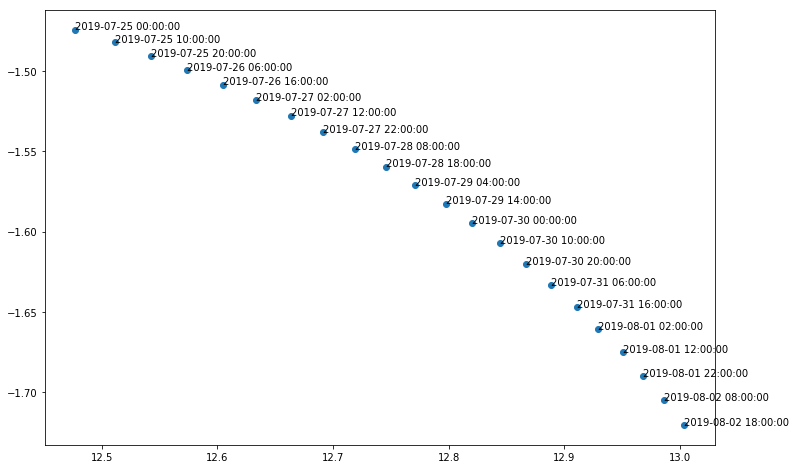

In [11]:
plt.figure(figsize = (12,8))
plt.plot(Eur_data["RA"][::10], Eur_data["DEC"][::10], "o")
for i in range(len(TIME))[::10]:
    plt.text(Eur_data["RA"][i], Eur_data["DEC"][i], TIME[i])
plt.show()

In [12]:
Eur_data["RA"][0]

12.47737

## Format equatorial coordinates

In [13]:
RAS_DECS = SkyCoord(Eur_data["RA"], Eur_data["DEC"], unit=(u.deg, u.deg),frame='icrs')
RAS = RAS_DECS.ra.deg
DECS= RAS_DECS.dec.deg

## Get center coordinates 

In [14]:
RA_mid = RAS[RAS.shape[0]/2]
DEC_mid= DECS[RAS.shape[0]/2]
print "mid RA: ",RA_mid,"deg ---- mid DEC: ",DEC_mid, "deg"

mid RA:  12.79224 deg ---- mid DEC:  -1.58019 deg


## Retrieve DSS survey images at FOV=1deg and FOV=11min

In [15]:

EU_im = SW.SkyView.get_images(position=str(RA_mid)+" "+str(DEC_mid), 
                                  radius = 1.*u.deg, 
                                  survey = ["DSS"])
EU_im2 = SW.SkyView.get_images(position=str(RAS[0])+" "+str(DECS[0]), 
                                  radius = 11./60.*u.deg, 
                                  survey = ["DSS"])

/usr/lib/python2.7/site-packages/astroquery/utils/commons.py:171: UserWarning: Coordinate string is being interpreted as an ICRS coordinate provided in degrees.
  warnings.warn("Coordinate string is being interpreted as an "


## Image Data and WCS conversion

In [16]:
IM  = EU_im[0][0].data
wcs = WCS(EU_im[0][0].header)

IM2  = EU_im2[0][0].data
wcs2 = WCS(EU_im2[0][0].header)

## Image FOV and Overplot Asteroid Coordinates

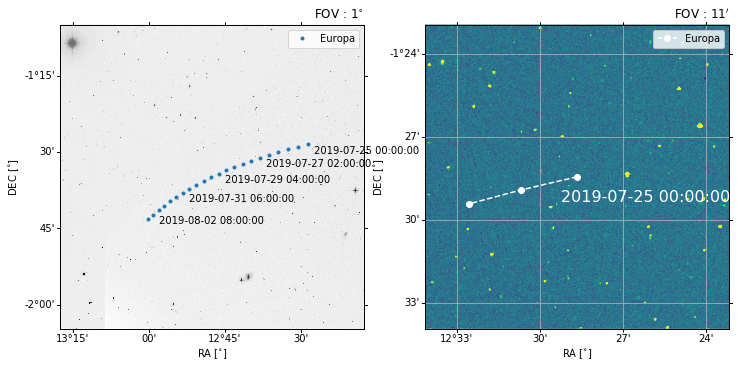

In [17]:
plt.figure(figsize = (12,8))

### left image 
ax = plt.subplot(121, projection = wcs)
ax.imshow(IM, cmap = "Greys")
ax.plot(Eur_data["RA"][::10], Eur_data["DEC"][::10], ".", 
        transform = ax.get_transform("world"), label = "Europa")
for i in range(len(TIME))[::50]:
    ax.text(Eur_data["RA"][i]-0.02, Eur_data["DEC"][i]-0.03, TIME[i], 
            transform = ax.get_transform("world"))
### right image
ax2 = plt.subplot(122, projection = wcs2)
ax2.imshow(IM2,vmax = IM2.mean()+8.*IM2.std())
ax2.plot(Eur_data["RA"][::10][:3], Eur_data["DEC"][::10][:3], "--o", 
        transform = ax2.get_transform("world"), color = "w", label = "Europa")

ax2.text(Eur_data["RA"][0]+0.01, Eur_data["DEC"][0]-0.015, TIME[0], 
             transform = ax2.get_transform("world"), color = "w", fontsize = 16)


ax.legend()
ax2.legend()

ax.set_ylabel(r"DEC $[^{\circ}]$")
ax.set_xlabel(r"RA $[^{\circ}]$")
ax2.set_ylabel(r"DEC $[^{\circ}]$")
ax2.set_xlabel(r"RA $[^{\circ}]$")

ax.set_title( r"FOV : $1^{\circ}$" , loc="right")
ax2.set_title(r"FOV : $11^{\prime}$", loc="right")
plt.grid(True)
plt.show()

## Query Objects in FOV and Plot

In [18]:
result_table = Simbad.query_region(str(RA_mid)+" "+str(DEC_mid), radius=0.7 * u.deg)
result_table

<Table masked=True length=489>
         MAIN_ID                 RA      ... COO_WAVELENGTH     COO_BIBCODE    
                              "h:m:s"    ...                                   
          object             unicode13   ...    unicode1           object      
-------------------------- ------------- ... -------------- -------------------
              LEDA 1117082    00 50 56.1 ...              O 2003A&A...412...45P
            TYC 4674-101-1 00 51 17.2689 ...              O 2018yCat.1345....0G
              LEDA 1112850    00 51 15.1 ...              O 2003A&A...412...45P
       NVSS J005055-012628   00 50 55.80 ...                1997ApJ...475..479W
              LEDA 1113210    00 50 36.6 ...              O 2003A&A...412...45P
              LEDA 1116174    00 50 30.9 ...              O 2003A&A...412...45P
            TYC 4674-171-1 00 50 26.0411 ...              O 2018yCat.1345....0G
  SDSS J005023.91-013208.7 00 50 23.9133 ...              O 2018yCat.1345....0G
               BD-02   113 00 51 23.4619 ...              O 2018yCat.1345....0G
                       ...           ... ...            ...                 ...
              LEDA 1114737    00 48 23.5 ...              O 2003A&A...412...45P
[VV2003c] J005312.2-010625  00 53 12.278 ...              O 2009yCat.2294....0A
 2SLAQ J004932.62-010057.3 00 49 32.6226 ...              O 2018yCat.1345....0G
  SDSS J005008.96-005559.8  00 50 08.963 ...              O 2014A&A...563A..54P
           TYC 4674-1113-1 00 53 47.4667 ...              O 2016A&A...595A...2G
                 PHL   844 00 48 40.8819 ...              O 2018yCat.1345....0G
              LEDA 1102559    00 53 09.7 ...              O 2003A&A...412...45P
 2SLAQ J005154.10-005424.0   00 51 54.10 ...              O 2006MNRAS.372..425C
  SDSS J005327.66-011044.3 00 53 27.6629 ...              O 2018yCat.1345....0G
CAIRNS J005253.84-010146.1   00 52 53.84 ...              O 2003AJ....126.2152R

In [19]:
result_table

TCOORD = RAS_DECS = SkyCoord(result_table["RA"], result_table["DEC"], unit=(u.hour, u.deg),frame='icrs')

SRA = TCOORD.ra.deg
SDEC= TCOORD.dec.deg

In [20]:
SRA[0]

12.733749999999999

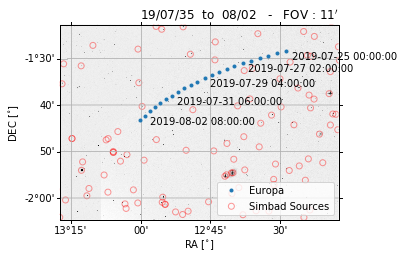

In [21]:
plt.figure(figsize = (5,4))
ax = plt.subplot(111, projection = wcs)
ax.imshow(IM, cmap = "Greys")

ax.scatter(SRA, SDEC, facecolors='none' ,
           edgecolor="red",
           transform = ax.get_transform("world"), 
           label ="Simbad Sources",
           alpha = 0.4)

ax.plot(Eur_data["RA"][::10], Eur_data["DEC"][::10], 
        ".", 
        transform = ax.get_transform("world"), 
        label = "Europa")

for i in range(len(TIME))[::50]:
    ax.text(Eur_data["RA"][i]-0.02, Eur_data["DEC"][i]-0.03, TIME[i], 
            transform = ax.get_transform("world"))



ax.legend(loc = "lower right")

ax.set_ylabel(r"DEC $[^{\circ}]$")
ax.set_xlabel(r"RA $[^{\circ}]$")
ax.set_title(r"19/07/35  to  08/02   -   FOV : $11^{\prime}$", loc="right")
plt.xlim([0,IM.shape[1]])
plt.ylim([0,IM.shape[0]*0.7])
plt.grid(True)
plt.show()
